In [1]:
import os

In [2]:
%pwd

'd:\\End-to-end-Machine-Learning-Project-with-MLflow\\research'

In [3]:
os.chdir("../")


In [4]:
%pwd

'd:\\End-to-end-Machine-Learning-Project-with-MLflow'

In [5]:
import os
from mlProject import logger
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Let therebe display from multiple commands

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
data=pd.read_csv("artifacts\data_ingestion\Train.csv")

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data.shape

(8523, 12)

In [10]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
data.describe() #Statistical view

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Data Exploration, Preprocessing and Cleaning 

In [13]:
data.isnull().sum()  # Checking null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)   #Filling missing values with mean for Item weight column for train.csv

C:\Users\dchopda\AppData\Local\Temp\ipykernel_5436\3902853805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)   #Filling missing values with mean for Item weight column for train.csv


In [15]:
data.Outlet_Size.value_counts()  # Balancing categories with less category value by filling missing with "High category"

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [16]:
data['Outlet_Size'].fillna("High", inplace=True)

C:\Users\dchopda\AppData\Local\Temp\ipykernel_5436\1067456457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Outlet_Size'].fillna("High", inplace=True)


In [17]:
data.isnull().sum() #No missing value in train file

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
data["Item_Fat_Content"].value_counts() #Low fat and regular category is duplicated (Lowfat with LF and lowfat /Regular with reg) Changed columns value from project to Project


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [19]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['LF'], 'Low Fat')
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['low fat'], 'Low Fat')
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(['reg'], 'Regular')

In [20]:
data["Item_Fat_Content"].value_counts()  #Replacement of column category is done with filling correct category and data correction is complete now

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
data ["Item_Identifier"].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [22]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [23]:
print(data['Item_Visibility'].mean())  # Checking mean value to fill Zeros with mean



0.06613202877895108


In [24]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0, 0.066132)

In [25]:
data[["Item_Visibility"]].value_counts() # Replaced Zeros with mean

Item_Visibility
0.066132           526
0.076975             3
0.112203             2
0.145266             2
0.071958             2
                  ... 
0.038729             1
0.038729             1
0.038725             1
0.038722             1
0.328391             1
Name: count, Length: 7880, dtype: int64

In [26]:
data['Years_Established'] = data['Outlet_Establishment_Year'].apply(lambda x: 2024 - x)
#data.head()

# Visualization

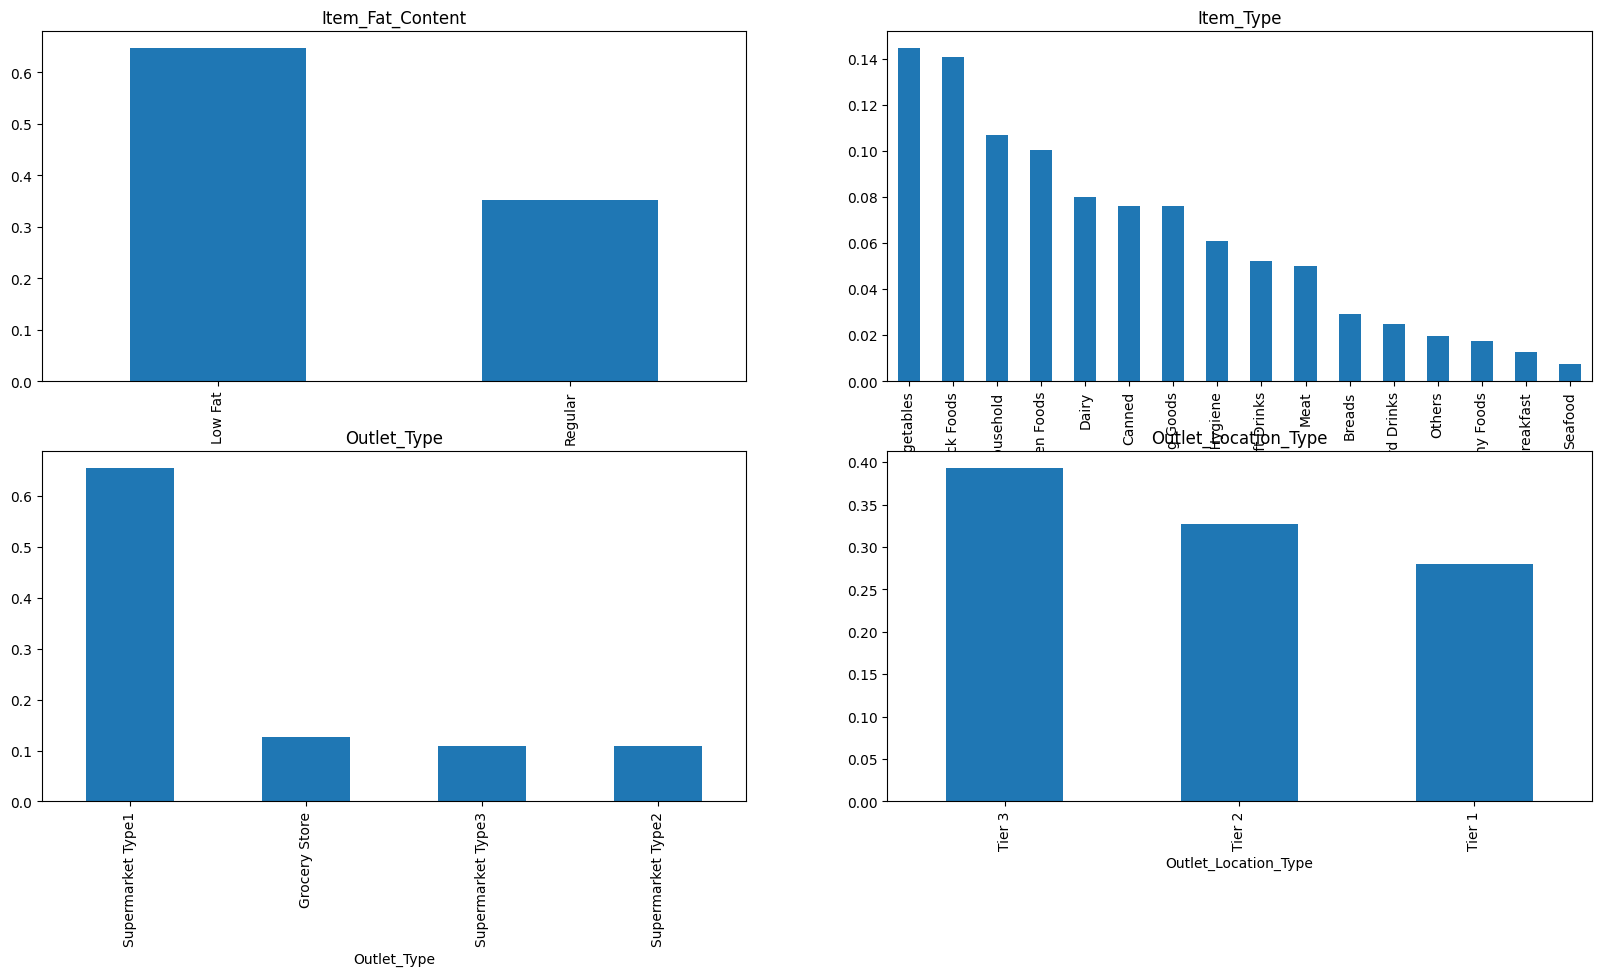

In [27]:
# Visualize independent categorical features
plt.figure(figsize = (20, 10))
plt.subplot(221)
data['Item_Fat_Content'].value_counts(normalize = True).plot.bar(title = 'Item_Fat_Content');
plt.subplot(222)
data['Item_Type'].value_counts(normalize = True).plot.bar(title = 'Item_Type');
plt.subplot(223)
data['Outlet_Type'].value_counts(normalize = True).plot.bar(title = 'Outlet_Type');
plt.subplot(224)
data['Outlet_Location_Type'].value_counts(normalize = True).plot.bar(title = 'Outlet_Location_Type');

# Item Fat content VS Target

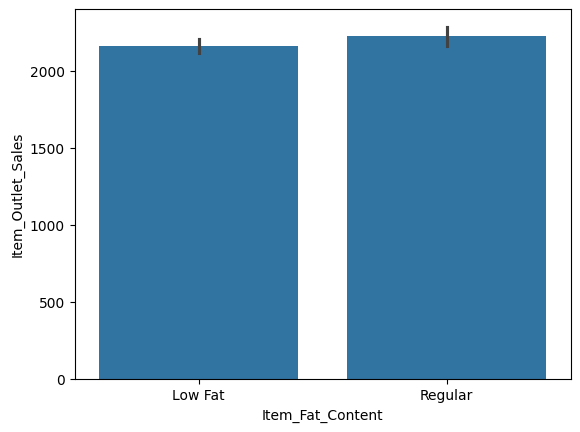

In [28]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data);
# Though people prefer more low fat product there is not much difference in the average sales

# Outlet_Type VS Target

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

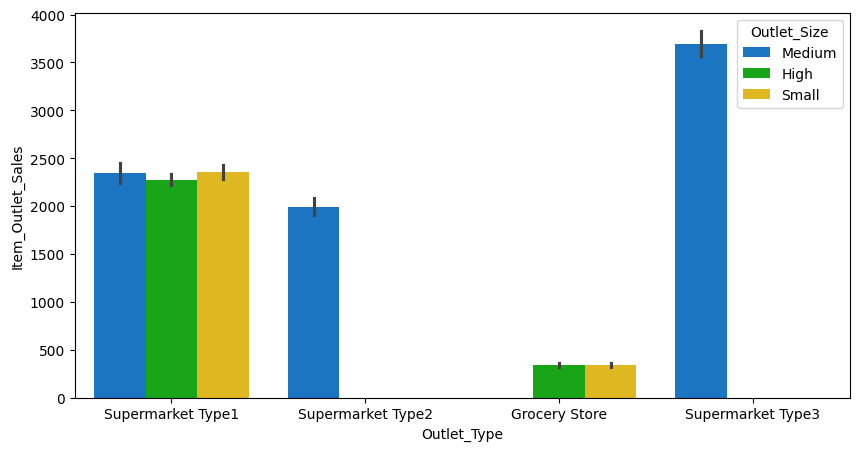

In [29]:
plt.figure(figsize=(10,5))

sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', hue='Outlet_Size', data=data ,palette='nipy_spectral')

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

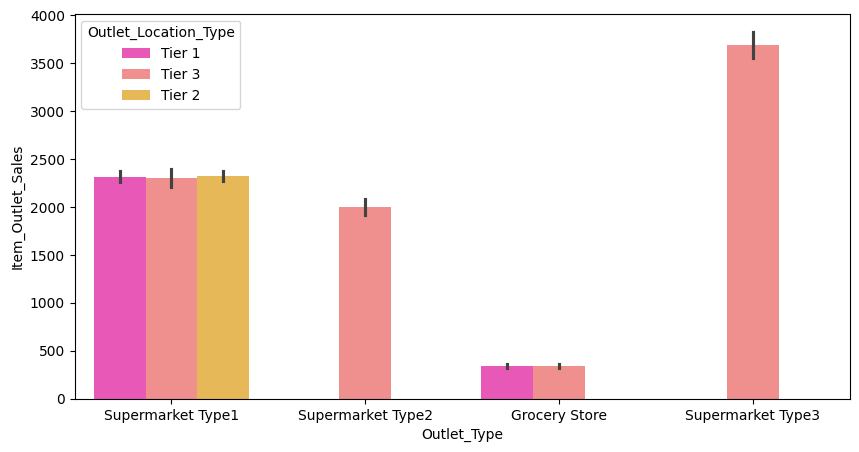

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=data ,palette='spring')

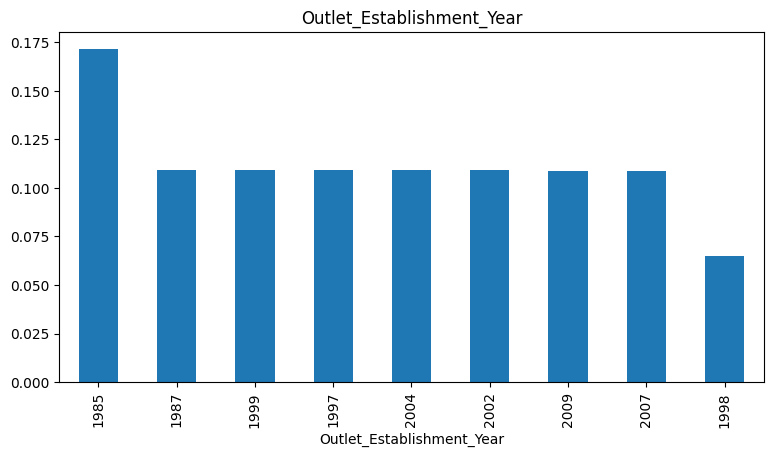

In [31]:
plt.figure(figsize = (20, 10))
plt.subplot(221)
data['Outlet_Establishment_Year'].value_counts(normalize = True).plot.bar(title = 'Outlet_Establishment_Year');

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

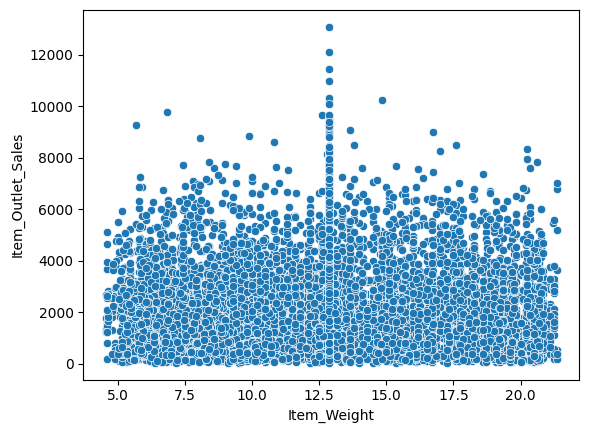

In [32]:
sns.scatterplot(data=data, x="Item_Weight", y="Item_Outlet_Sales")

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

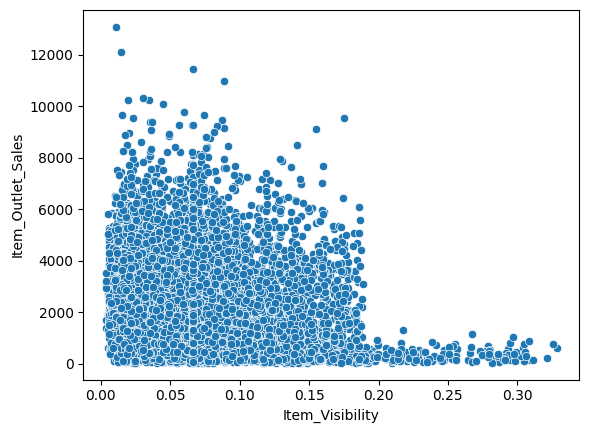

In [33]:
sns.scatterplot(data=data, x="Item_Visibility", y="Item_Outlet_Sales")


<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

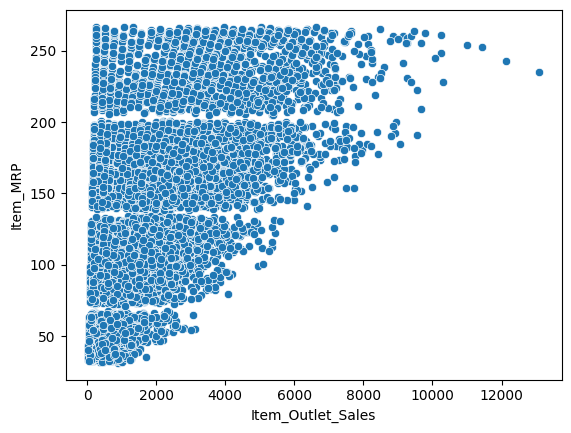

In [34]:
sns.scatterplot(data=data, x="Item_Outlet_Sales", y="Item_MRP")


<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

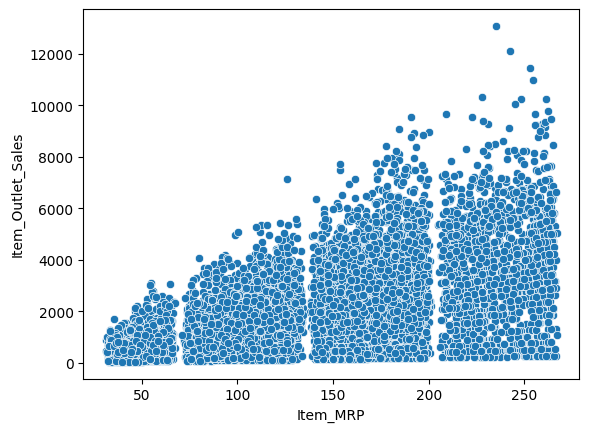

In [35]:
sns.scatterplot(data=data, x="Item_MRP", y="Item_Outlet_Sales")


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

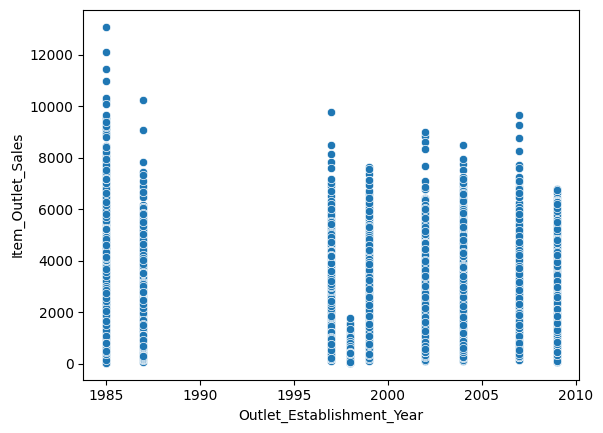

In [36]:
sns.scatterplot(data=data, x="Outlet_Establishment_Year", y="Item_Outlet_Sales")


In [37]:
data['Item_Outlet_Sales'].corr(data['Item_Weight'])

0.011550000817702355

In [38]:
data['Item_Visibility'].corr(data['Item_MRP'])


-0.005258905861178085

In [39]:
data['Item_Outlet_Sales'].corr(data['Item_Visibility'])


-0.13413765937275873

In [40]:
data['Item_Outlet_Sales'].corr(data['Item_MRP'])


0.5675744466569195

In [41]:
data['Item_Outlet_Sales'].corr(data['Outlet_Establishment_Year'])


-0.04913497044082085

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

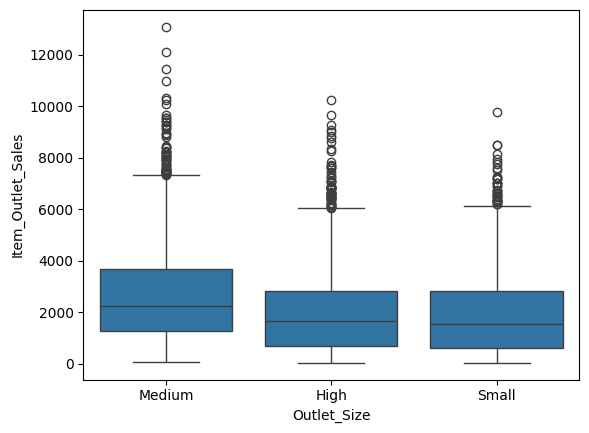

In [42]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)


<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

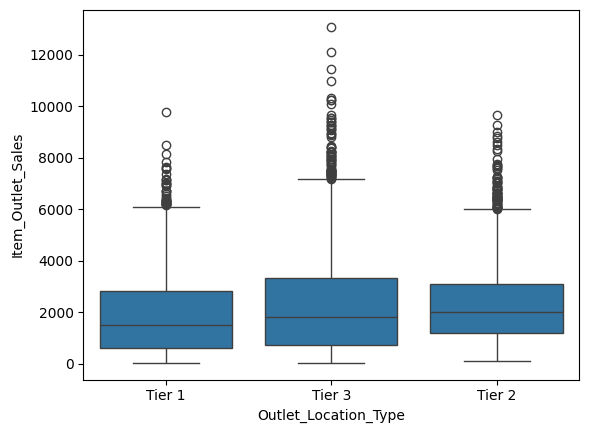

In [43]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)


<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

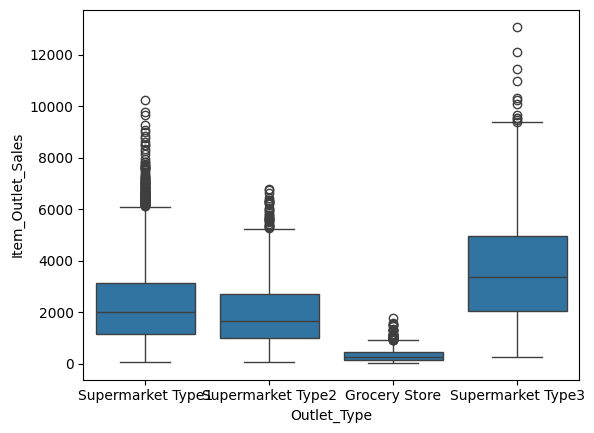

In [44]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)


<Figure size 2400x800 with 0 Axes>

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

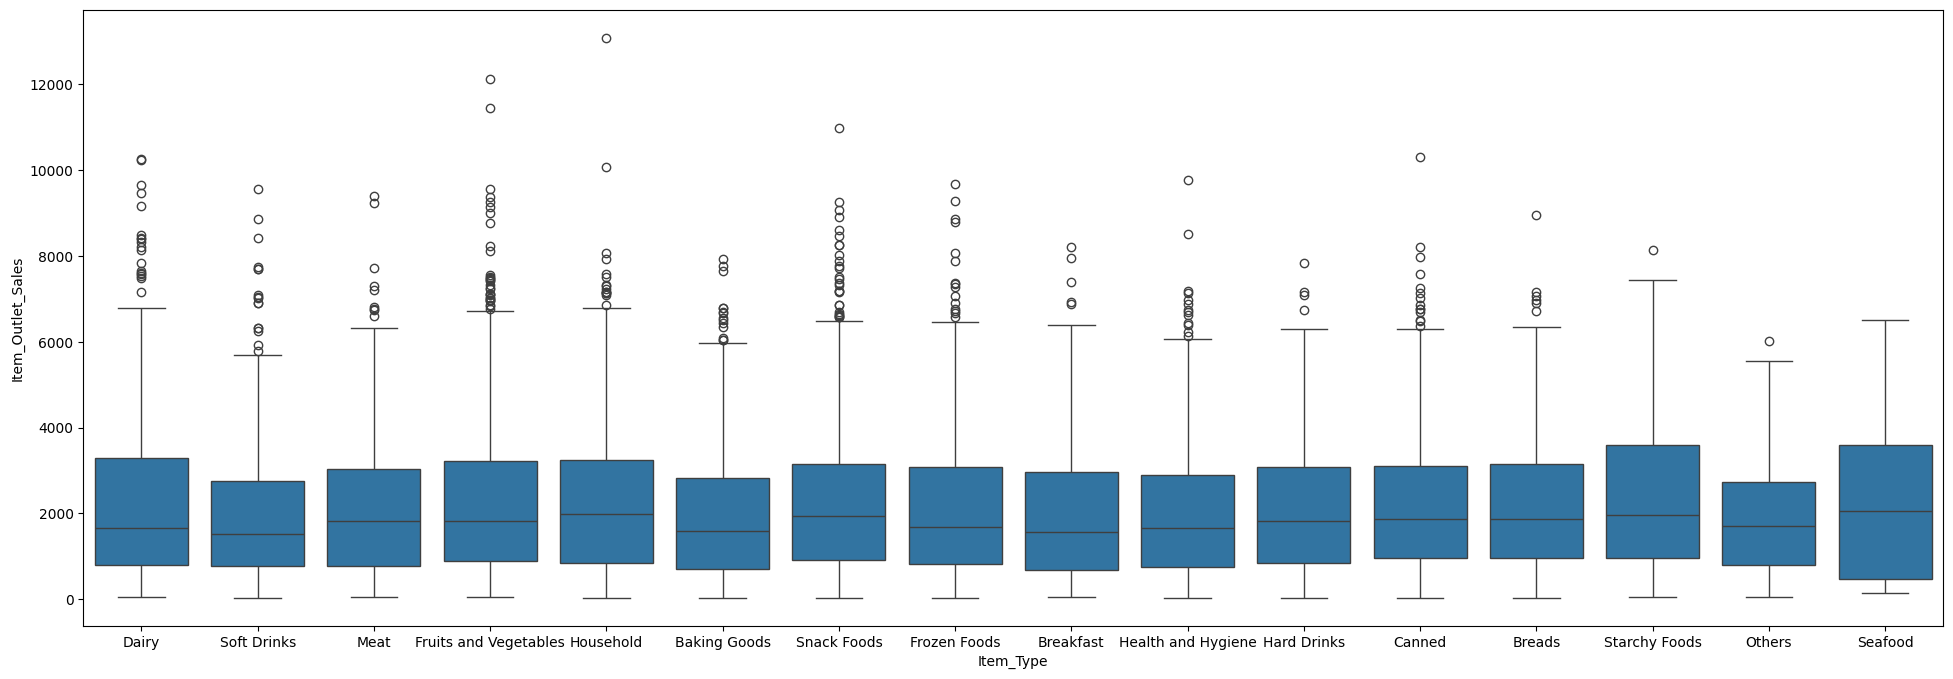

In [45]:
plt.figure(figsize=(24,8))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data)

<Figure size 2400x800 with 0 Axes>

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

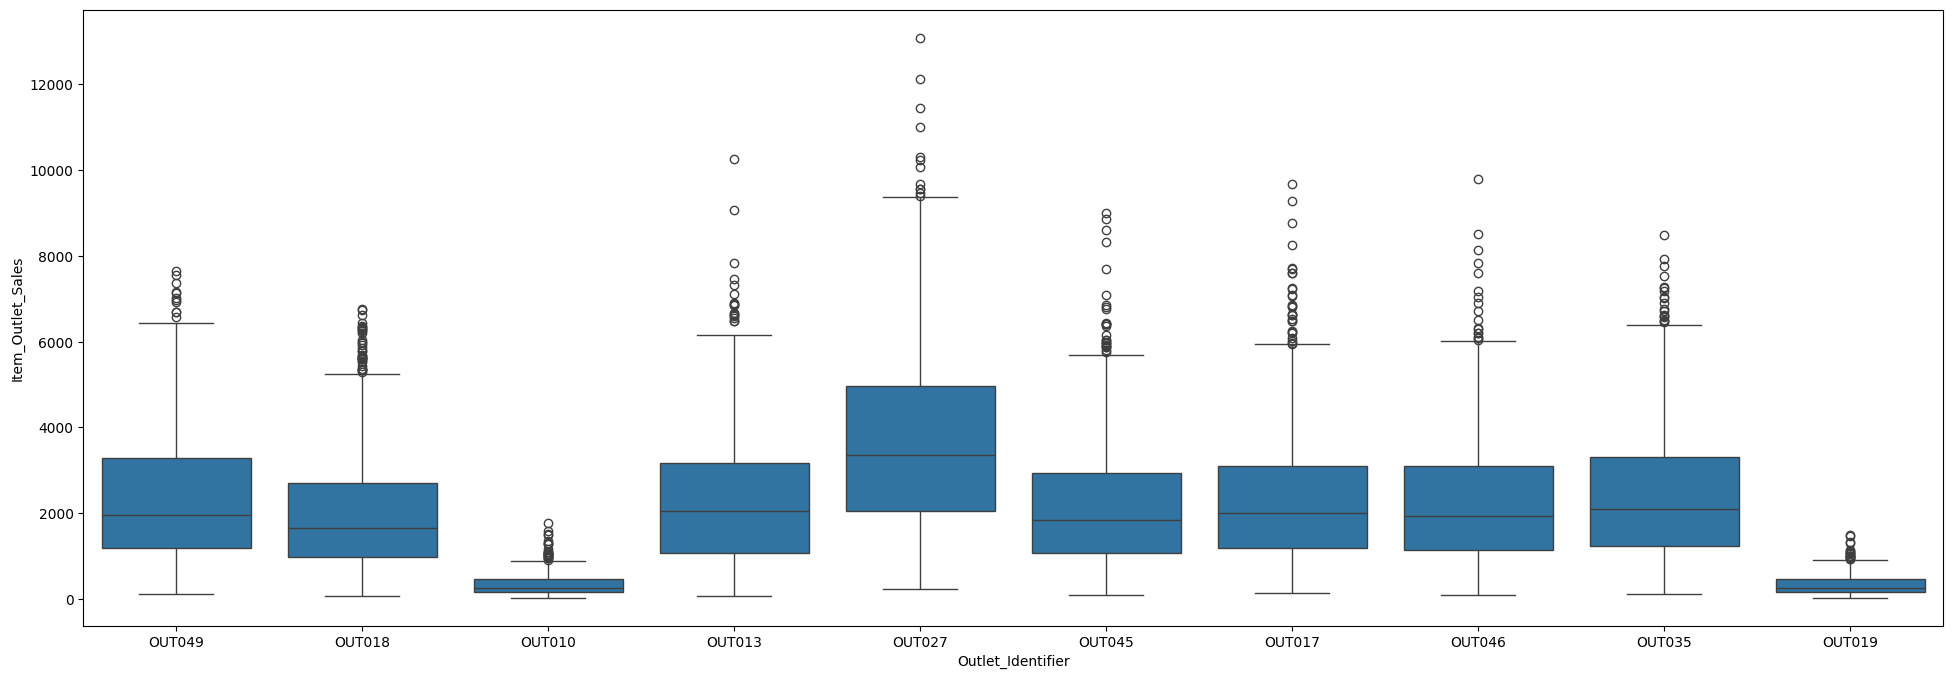

In [46]:
plt.figure(figsize=(24,8))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data)

<Figure size 2400x800 with 0 Axes>

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

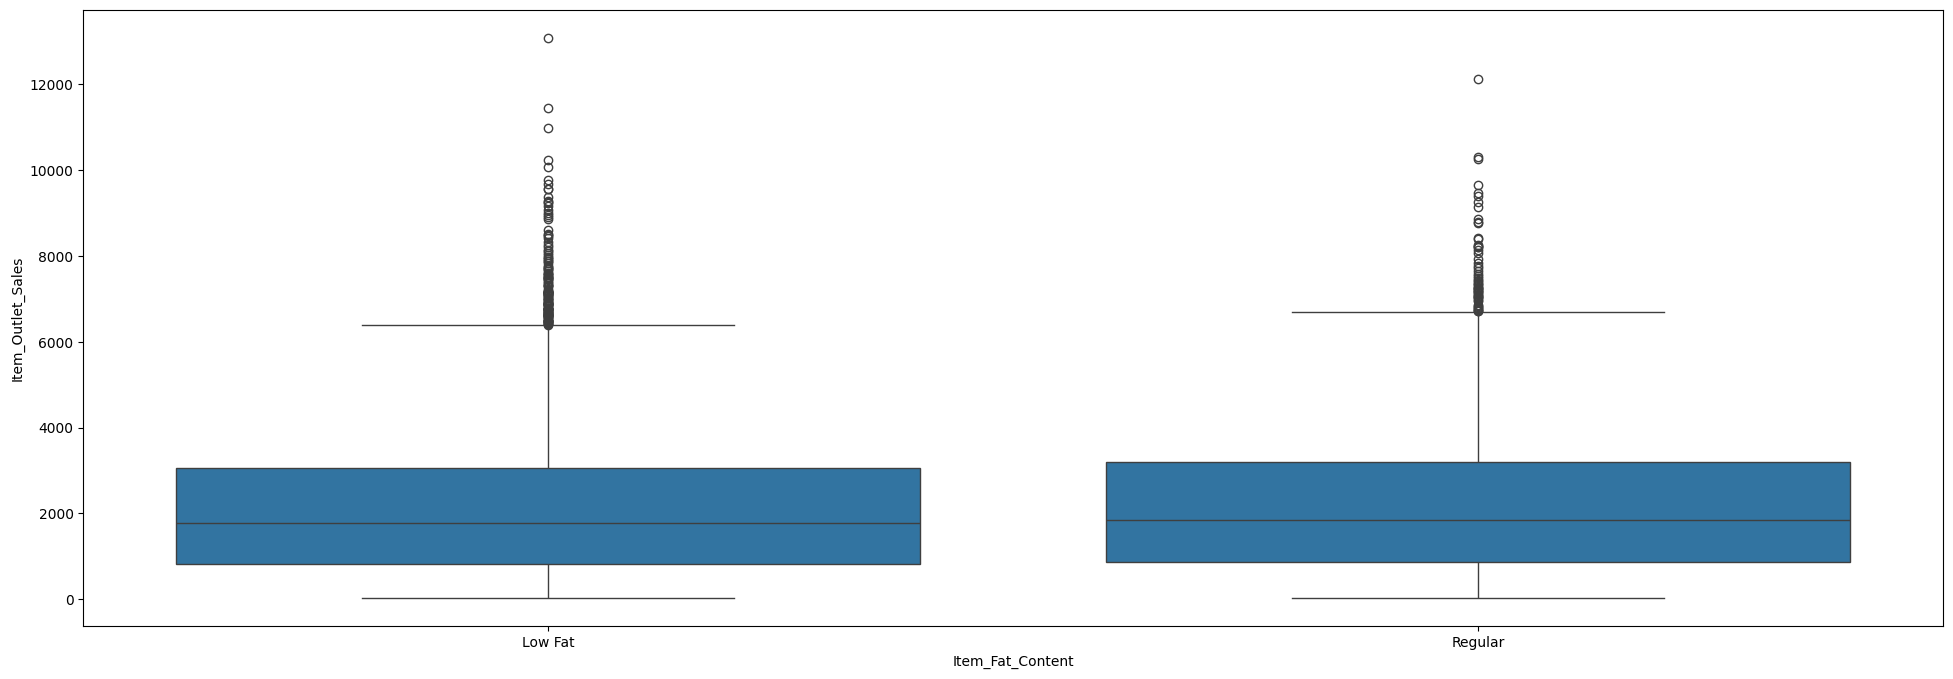

In [47]:
plt.figure(figsize=(24,8))
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data)

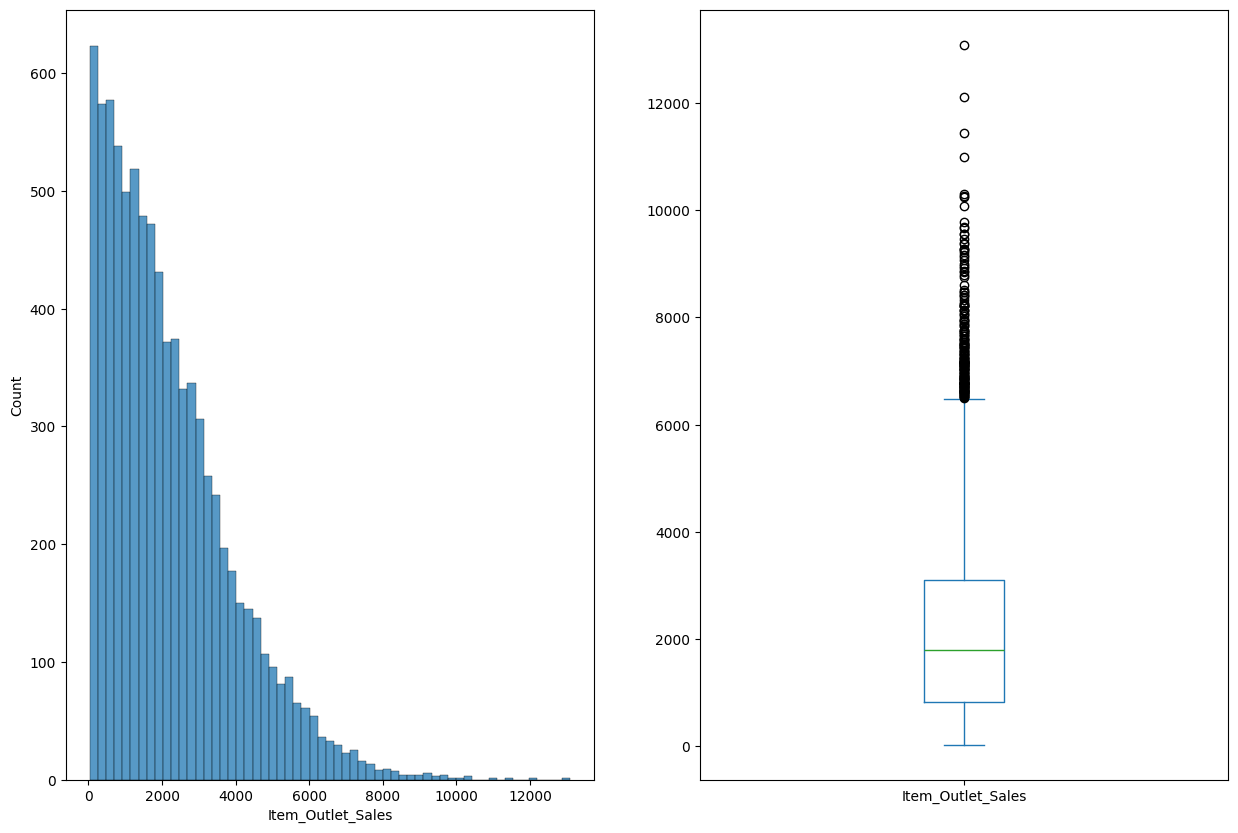

In [48]:
# Target variable distribution
# Visualize Target variable

plt.figure(1);
plt.subplot(121);
sns.histplot(data['Item_Outlet_Sales']);
plt.subplot(122);
data['Item_Outlet_Sales'].plot.box(figsize = (15, 10));
plt.show();

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='NewTargetwith_BOXCOX', ylabel='Count'>

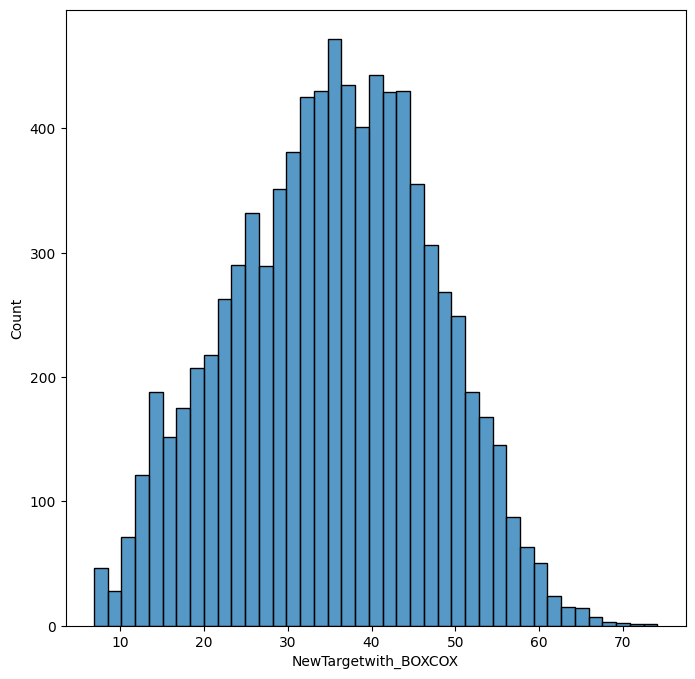

In [49]:
# Applying BOXCOX transformation on Target variable


from scipy.stats import boxcox
data["NewTargetwith_BOXCOX"] = boxcox(data['Item_Outlet_Sales'])[0]
plt.figure(figsize = (8, 8))
sns.histplot(data["NewTargetwith_BOXCOX"])
plt.show()

In [50]:
# Log transform a single column
data['NewTargetwithLOG'] = np.log(data['Item_Outlet_Sales'])

<Axes: xlabel='NewTargetwithLOG', ylabel='Count'>

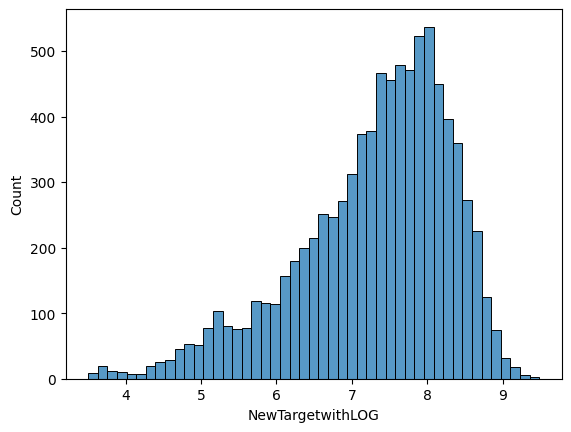

In [51]:
#plt.figure(figsize = (8, 8))
sns.histplot(data["NewTargetwithLOG"])
plt.show()

# Understanding Sales%

In [52]:
# Sales % as per Item_Fat_Content
Item_Fat_Content_TotalSales = data.groupby('Item_Fat_Content').aggregate({'Item_Outlet_Sales': 'mean',
                                                          'Item_Identifier': 'size'
                                                          }).reset_index()

Item_Fat_Content_TotalSales['SalesPercentage'] = Item_Fat_Content_TotalSales['Item_Outlet_Sales'] / Item_Fat_Content_TotalSales['Item_Identifier']



In [53]:
Item_Fat_Content_TotalSales

,Item_Fat_Content,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Low Fat,2157.711534,5517,0.391102
1,Regular,2224.561170,3006,0.740040


In [54]:
# Sales % as per Item_Type_TotalSales
Item_Type_TotalSales = data.groupby('Item_Type').aggregate({'Item_Outlet_Sales': 'mean',
                                                         'Item_Identifier': 'size'
                                                         }).reset_index()

Item_Type_TotalSales['SalesPercentage'] = Item_Type_TotalSales['Item_Outlet_Sales'] / Item_Type_TotalSales['Item_Identifier']

In [55]:
Item_Type_TotalSales

,Item_Type,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Baking Goods,1952.971207,648,3.013844
1,Breads,2204.132226,251,8.781403
2,Breakfast,2111.808651,110,19.198260
3,Canned,2225.194904,649,3.428652
4,Dairy,2232.542597,682,3.273523
5,Frozen Foods,2132.867744,856,2.491668
6,Fruits and Vegetables,2289.009592,1232,1.857962
7,Hard Drinks,2139.221622,214,9.996363
8,Health and Hygiene,2010.000265,520,3.865385
9,Household,2258.784300,910,2.482181


In [56]:
# Sales % as per # Sales % as per Outlet_Establishment_Year

Outlet_Establishment_Year_TotalSales = data.groupby('Outlet_Establishment_Year').aggregate({'Item_Outlet_Sales': 'mean',
                                                         'Item_Identifier': 'size'
                                                         }).reset_index()

Outlet_Establishment_Year_TotalSales['SalesPercentage'] = Outlet_Establishment_Year_TotalSales['Item_Outlet_Sales'] / Outlet_Establishment_Year_TotalSales['Item_Identifier']

In [57]:
Outlet_Establishment_Year_TotalSales

,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,1985,2483.677474,1463,1.697661
1,1987,2298.995256,932,2.466733
2,1997,2277.844267,930,2.449295
3,1998,339.351662,555,0.611444
4,1999,2348.354635,930,2.525113
5,2002,2192.384798,929,2.359941
6,2004,2438.841866,930,2.622411
7,2007,2340.675263,926,2.527727
8,2009,1995.498739,928,2.150322


In [58]:
# Sales % as per Outlet_Size
Outlet_Size_TotalSales = data.groupby('Outlet_Size').aggregate({'Item_Outlet_Sales': 'mean',
                                                         'Item_Identifier': 'size'
                                                         }).reset_index()

Outlet_Size_TotalSales['SalesPercentage'] = Outlet_Size_TotalSales['Item_Outlet_Sales'] / Outlet_Size_TotalSales['Item_Identifier']

In [59]:
Outlet_Size_TotalSales

,Outlet_Size,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,High,1955.474124,3342,0.585121
1,Medium,2681.603542,2793,0.960116
2,Small,1912.149161,2388,0.800732


In [60]:
 # Sales % as per Outlet_Location_Type
Outlet_Location_Type_TotalSales = data.groupby('Outlet_Location_Type').aggregate({'Item_Outlet_Sales': 'mean',
                                                         'Item_Identifier': 'size'
                                                          }).reset_index()

Outlet_Location_Type_TotalSales['SalesPercentage'] = Outlet_Location_Type_TotalSales['Item_Outlet_Sales'] / Outlet_Location_Type_TotalSales['Item_Identifier']


In [61]:
Outlet_Location_Type_TotalSales


,Outlet_Location_Type,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Tier 1,1876.909159,2388,0.785975
1,Tier 2,2323.990559,2785,0.834467
2,Tier 3,2279.627651,3350,0.680486


In [62]:

# Sales % as per # Sales % as per Outlet_Type
Outlet_Type_TotalSales = data.groupby('Outlet_Type').aggregate({'Item_Outlet_Sales': 'mean',
                                                           'Item_Identifier': 'size'
                                                          }).reset_index()

Outlet_Type_TotalSales['SalesPercentage'] = Outlet_Type_TotalSales['Item_Outlet_Sales'] / Outlet_Type_TotalSales['Item_Identifier']

In [63]:
Outlet_Type_TotalSales

,Outlet_Type,Item_Outlet_Sales,Item_Identifier,SalesPercentage
0,Grocery Store,339.828500,1083,0.313784
1,Supermarket Type1,2316.181148,5577,0.415310
2,Supermarket Type2,1995.498739,928,2.150322
3,Supermarket Type3,3694.038558,935,3.950843


<Axes: >

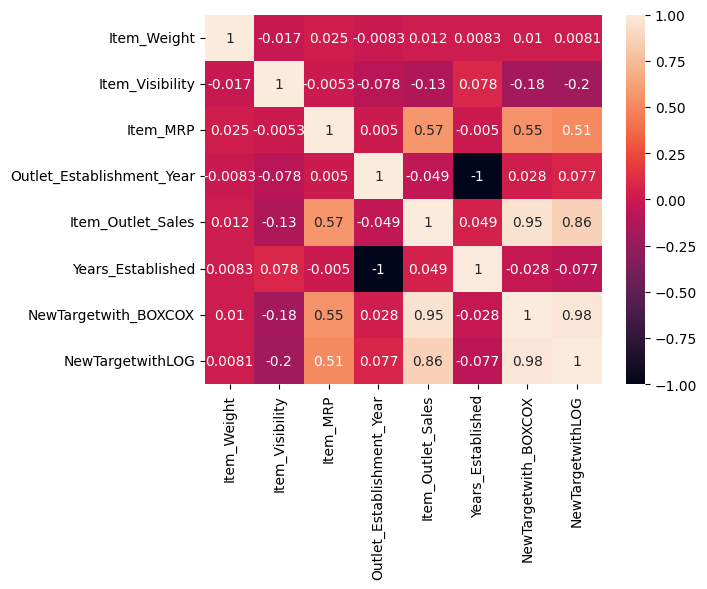

In [64]:
#plt.figure()
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

In [65]:
data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [66]:
data.columns



Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Years_Established', 'NewTargetwith_BOXCOX', 'NewTargetwithLOG'],
      dtype='object')

In [67]:
# Preprocessing Task before Model Building
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Item_Fat_Content']= le.fit_transform(data['Item_Fat_Content'])
data['Item_Type']= le.fit_transform(data['Item_Type'])
data['Outlet_Size']= le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']= le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']= le.fit_transform(data['Outlet_Type'])

In [68]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established,NewTargetwith_BOXCOX,NewTargetwithLOG
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,25,47.007900,8.225540
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,15,20.958299,6.094524
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,25,37.964904,7.648392
3,19.20,1,0.066132,6,182.0950,1998,0,2,0,732.3800,26,25.485936,6.596300
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,994.7052,37,28.660865,6.902446


In [69]:
data=data.drop(['NewTargetwith_BOXCOX','Item_Outlet_Sales'],axis=1,index=None)

In [70]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established,NewTargetwithLOG
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,25,8.225540
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,15,6.094524
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,25,7.648392
3,19.20,1,0.066132,6,182.0950,1998,0,2,0,26,6.596300
4,8.93,0,0.066132,9,53.8614,1987,0,2,1,37,6.902446


In [71]:
data.to_csv(index=False)

'Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established,NewTargetwithLOG\r\n9.3,0,0.016047301,4,249.8092,1999,1,0,1,25,8.22554004467553\r\n5.92,1,0.019278216,14,48.2692,2009,1,2,2,15,6.094523716699177\r\n17.5,0,0.016760075,10,141.618,1999,1,0,1,25,7.648391777978466\r\n19.2,1,0.066132,6,182.095,1998,0,2,0,26,6.596299504945249\r\n8.93,0,0.066132,9,53.8614,1987,0,2,1,37,6.9024464118515505\r\n10.395,1,0.066132,0,51.4008,2009,1,2,2,15,6.3218626592434894\r\n13.65,1,0.012741089,13,57.6588,1987,0,2,1,37,5.8393408116403505\r\n12.857645184135976,0,0.127469857,13,107.7622,1985,1,2,3,39,8.299724408105405\r\n16.2,1,0.016687114,5,96.9726,2002,0,1,1,22,6.981561905735894\r\n19.2,1,0.09444959,5,187.8214,2007,0,1,1,17,8.457556768670226\r\n11.8,0,0.066132,6,45.5402,1999,1,0,1,25,7.323848112222527\r\n18.5,1,0.045463773,4,144.1102,1997,2,0,1,27,7.690355977077498\r\n15.1,1,0.1000135,6,145.4786,1999,1,0,1,25,7.3

In [72]:
data.to_csv(r'D:\data1.csv',index=False)

In [73]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path

In [74]:
from mlProject.constants import *
from mlProject.utils.common import read_yaml, create_directories

In [75]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    
    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation

        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir=config.root_dir,
            data_path=config.data_path,
        )

        return data_transformation_config

In [76]:
class DataTransformation:
    def __init__(self, config: DataTransformationConfig):
        self.config = config

    
    ## Note: You can add different data transformation techniques such as Scaler, PCA and all
    #You can perform all kinds of EDA in ML cycle here before passing this data to the model

    # I am only adding train_test_spliting cz this data is already cleaned up


    def train_test_spliting(self):
        data = pd.read_csv(self.config.data_path)

        # Split the data into training and test sets. (0.75, 0.25) split.
        X_train, X_test = train_test_split(data)

        X_train.to_csv(os.path.join(self.config.root_dir, "X_train.csv"),index = False)
        X_test.to_csv(os.path.join(self.config.root_dir, "X_test.csv"),index = False)

        logger.info("Splited data into training and test sets")
        logger.info(X_train.shape)
        logger.info(X_test.shape)

        print(X_train.shape)
        print(X_test.shape)

In [77]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    data_transformation.train_test_spliting()
except Exception as e:
    raise e

[2024-07-07 17:36:55,521: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-07-07 17:36:55,524: INFO: common: yaml file: params.yaml loaded successfully]
[2024-07-07 17:36:55,528: INFO: common: yaml file: schema.yaml loaded successfully]
[2024-07-07 17:36:55,530: INFO: common: created directory at: artifacts]
[2024-07-07 17:36:55,531: INFO: common: created directory at: artifacts/data_transformation]
[2024-07-07 17:36:56,233: INFO: 1585967378: Splited data into training and test sets]
[2024-07-07 17:36:56,234: INFO: 1585967378: (6392, 11)]
[2024-07-07 17:36:56,236: INFO: 1585967378: (2131, 11)]
(6392, 11)
(2131, 11)


# Model Building